## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
unzip bank+marketing.zip 
unzip bank.zip
```

We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not. 

### Dataset preparation

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`



Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [89]:
columns = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]


In [90]:
df = df[columns]

In [91]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [93]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_full_train), len(df_train), len(df_val), len(df_test)

y_full_train = (df_full_train['y'] == 'yes').astype(int)
y_train = (df_train['y'] == 'yes').astype(int)
y_test = (df_test['y'] == 'yes').astype(int)
y_val = (df_val['y'] == 'yes').astype(int)

del df_full_train['y']
del df_train['y']
del df_test['y']
del df_val['y']

In [94]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [95]:
categoricals = list(df_train.dtypes[df_train.dtypes == 'object'].index)
categoricals

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [96]:
numericals = list(df.dtypes[df.dtypes != 'object'].index)
numericals

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [97]:
df_numserical = df_train[numericals]
df_numserical

,age,balance,day,duration,campaign,pdays,previous
14137,56,40,11,123,2,-1,0
33506,33,4790,20,137,1,272,2
27524,32,392,21,148,2,-1,0
34058,40,2129,30,452,1,-1,0
25922,54,1180,19,394,2,-1,0
...,...,...,...,...,...,...,...
22520,32,195,22,239,2,-1,0
26678,52,3720,20,114,2,-1,0
4964,52,289,21,45,13,-1,0
20083,32,312,11,67,4,-1,0


### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `y` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`

In [98]:
from sklearn.metrics import roc_auc_score

In [99]:
roc_auc_score(y_train, df_numserical['age'])

0.48781428247265596

In [100]:
for n in numericals:
    auc = roc_auc_score(y_train, df_numserical[n])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_numserical[n])
        print(f'AUC for {n} is {auc}')
        print()
    else:
        print(f'AUC for {n} is {auc}')
        print()

AUC for age is 0.512185717527344

AUC for balance is 0.5888313805382317

AUC for day is 0.525957882383908

AUC for duration is 0.8147002759670778

AUC for campaign is 0.5714543015682159

AUC for pdays is 0.5901276247352144

AUC for previous is 0.5985653242764153



In [101]:
#Q1 answer: duration

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99

In [102]:
dv = DictVectorizer(sparse=False)

In [103]:
train_dicts = df_train[categoricals + numericals].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [104]:
val_dicts = df_val[categoricals + numericals].to_dict(orient= 'records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:,1]
subscribe_decision = (y_pred > 0.5)
(y_val == subscribe_decision).mean()

0.898363193983632

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
conf_matrix = confusion_matrix(y_val, subscribe_decision)
conf_matrix 

array([[7752,  192],
       [ 727,  371]])

In [107]:
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
TP = conf_matrix[1,1]

tpr = TP / (TP + FN)
fpr = FP / (TN + FP)

tpr,fpr

(0.33788706739526414, 0.02416918429003021)

In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [109]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr).round(3)

0.9

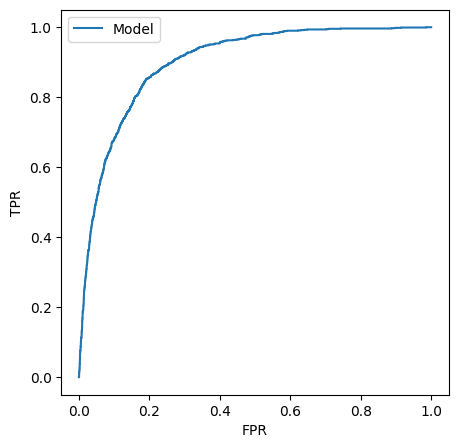

In [110]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [111]:
#Q2 answer: 0.89

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [112]:
tholds = np.arange(0.0, 1.01, 0.01)
tholds

    

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [113]:
listam = []
for t in tholds:
    subscribe_decision = (y_pred > t)
    cm = confusion_matrix(y_val, subscribe_decision)
    
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[1,1]
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN)  if (TP + FN) > 0 else 0
    
    result = [t, precision, recall]
    
    listam.append(result)
    
    

In [114]:
listam = pd.DataFrame(listam, columns=['threshold', 'precision_score', 'recall_score'])
listam


,threshold,precision_score,recall_score
0,0.00,0.121433,1.000000
1,0.01,0.135682,0.996357
2,0.02,0.159306,0.995446
3,0.03,0.187220,0.989982
4,0.04,0.219613,0.970856
...,...,...,...
96,0.96,0.645833,0.028233
97,0.97,0.625000,0.022769
98,0.98,0.677419,0.019126
99,0.99,0.647059,0.010018


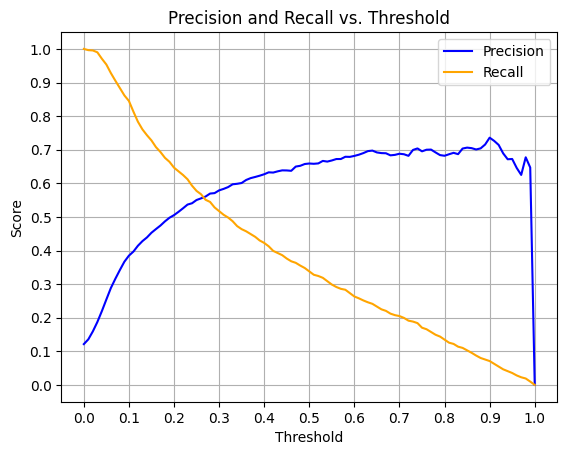

In [115]:
plt.plot(listam['threshold'], listam['precision_score'],  label='Precision', color='blue')

plt.plot(listam['threshold'], listam['recall_score'],  label='Recall', color='orange')

plt.title('Precision and Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.legend()
plt.grid()
plt.show()

In [116]:
listam[(listam['threshold'] > 0.2) & (listam['threshold'] < 0.3)]

,threshold,precision_score,recall_score
21,0.21,0.515129,0.635701
22,0.22,0.525670,0.624772
23,0.23,0.536741,0.612022
24,0.24,0.540698,0.592896
25,0.25,0.550347,0.577413
26,0.26,0.555258,0.567395
27,0.27,0.560704,0.551002
28,0.28,0.569524,0.544627
29,0.29,0.570866,0.528233


In [117]:
#Q3 answer: 0.265

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62


In [118]:
listam = []
for t in tholds:
    subscribe_decision = (y_pred > t)
    cm = confusion_matrix(y_val, subscribe_decision)
    
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[1,1]
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN)  if (TP + FN) > 0 else 0
    
    f1_score = 2 * ((precision * recall) / (precision + recall)) if (precision + recall) > 0 else 0

    
    result = [t, precision, recall, f1_score]
    
    listam.append(result)
    
listam = pd.DataFrame(listam, columns=['threshold', 'precision_score', 'recall_score', 'F1_score'])
listam

,threshold,precision_score,recall_score,F1_score
0,0.00,0.121433,1.000000,0.216568
1,0.01,0.135682,0.996357,0.238839
2,0.02,0.159306,0.995446,0.274658
3,0.03,0.187220,0.989982,0.314890
4,0.04,0.219613,0.970856,0.358199
...,...,...,...,...
96,0.96,0.645833,0.028233,0.054101
97,0.97,0.625000,0.022769,0.043937
98,0.98,0.677419,0.019126,0.037201
99,0.99,0.647059,0.010018,0.019731


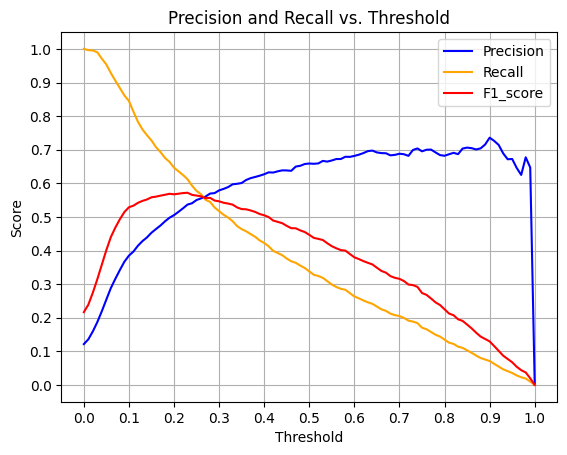

In [119]:
plt.plot(listam['threshold'], listam['precision_score'],  label='Precision', color='blue')

plt.plot(listam['threshold'], listam['recall_score'],  label='Recall', color='orange')

plt.plot(listam['threshold'], listam['F1_score'],  label='F1_score', color='red')


plt.title('Precision and Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.legend()
plt.grid()
plt.show()

In [120]:
f1_max = listam['F1_score'].max()
f1_max

0.5719148936170212

In [121]:
listam[listam['F1_score'] == f1_max]

,threshold,precision_score,recall_score,F1_score
23,0.23,0.536741,0.612022,0.571915


In [122]:
#Q4 answer: 0.265

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26

In [123]:
from sklearn.model_selection import KFold

In [124]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [125]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categoricals + numericals].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [126]:
dv, model = train(df_train, y_train)

In [127]:
def predict(df, dv, model):
    dicts = df[categoricals + numericals].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [128]:
y_pred = predict(df_val, dv, model)

In [133]:
scores = []

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

for train_idx, val_idx in kf.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    y_train = df_train.y.values
    y_val = df_val.y.values
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
print((np.mean(scores), np.std(scores).round(3)))

(0.9059170091488914, 0.006)


In [134]:
#Q5 answer: 0.006

### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [136]:
for C in [0.000001, 0.001, 1]:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []
    

    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

    for train_idx, val_idx in kf.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        y_train = df_train.y.values
        y_val = df_val.y.values
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1e-06 0.906 +- 0.006
C=0.001 0.906 +- 0.006
C=1 0.906 +- 0.006


In [137]:
#Q6 answer: 0.000001